# Exploratory_data_analysis

## Next Steps
1. Map Bitcoin price data to Tweet data

#### Notes
- Could flag for keywords e.g. ETF

## Code

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import time

import datetime as dt

In [2]:
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

### Read in data

In [3]:
# Tweet data
tweet_data = pd.read_csv('all_tweets_data_BACKUP_20190115_7.csv', index_col=0)
tweet_data_2 = pd.read_csv('1.Data\\all_tweets_data_BACKUP_20190110.csv', index_col=0)

In [4]:
tweets_master = tweet_data.append(tweet_data_2).drop_duplicates()

In [38]:
# Bitcoin data
bitcoin_data = pd.read_csv('1.Data\\bitstampUSD_1-min_data_2012-01-01_to_2018-11-11.csv')
CB_bitcoin_data = pd.read_csv('1.Data\\coinbaseUSD_1-min_data_2014-12-01_to_2018-11-11.csv')

### Look at data

In [39]:
tweet_data.head(2)

,date,exchange,influencer,news,project,retweets,tweet_text,user
0,2019-01-15 05:54:12,0,1,0,0,0,https://www.theguardian.com/world/2019/jan/15/...,@mikojava
1,2019-01-11 22:27:50,0,1,0,0,0,https://www.facebook.com/mikos/posts/101580781...,@mikojava


In [40]:
tweet_data.shape

(501439, 8)

In [41]:
tweet_data_2.shape

(237191, 8)

In [42]:
tweets_master.shape

(481627, 10)

In [43]:
bitcoin_data.isnull().sum()

Timestamp                  0
Open                 1214307
High                 1214307
Low                  1214307
Close                1214307
Volume_(BTC)         1214307
Volume_(Currency)    1214307
Weighted_Price       1214307
dtype: int64

In [44]:
bitcoin_data.shape

(3603136, 8)

In [45]:
CB_bitcoin_data.isnull().sum()

Timestamp                 0
Open                 108957
High                 108957
Low                  108957
Close                108957
Volume_(BTC)         108957
Volume_(Currency)    108957
Weighted_Price       108957
dtype: int64

In [46]:
CB_bitcoin_data.shape

(2016354, 8)

In [47]:
bitcoin_data.head(3)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
CB_bitcoin_data.head(2)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
CB_bitcoin_data.dtypes

Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object

In [50]:
CB_bitcoin_data.describe()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
count,2.016354e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06,1.907397e+06
mean,1.481396e+09,3.208583e+03,3.209990e+03,3.207058e+03,3.208584e+03,7.684054e+00,3.551276e+04,3.208523e+03
std,3.493807e+07,3.873144e+03,3.875432e+03,3.870698e+03,3.873140e+03,1.820454e+01,1.411277e+05,3.873066e+03
min,1.417412e+09,6.000000e-02,6.000000e-02,6.000000e-02,6.000000e-02,1.000000e-08,2.641700e-06,6.000000e-02
25%,1.451159e+09,4.156000e+02,4.156800e+02,4.155000e+02,4.155900e+02,8.776600e-01,5.962574e+02,4.155902e+02
50%,1.481404e+09,9.099600e+02,9.101000e+02,9.095700e+02,9.099800e+02,2.641103e+00,3.313449e+03,9.099194e+02
75%,1.511649e+09,6.374660e+03,6.375150e+03,6.373310e+03,6.374670e+03,7.478157e+00,1.855195e+04,6.374404e+03
max,1.541894e+09,1.989199e+04,1.989199e+04,1.989198e+04,1.989199e+04,1.563267e+03,1.997076e+07,1.989199e+04


In [51]:
# combine bitcoin data sets
bitcoin_master = pd.concat([bitcoin_data,CB_bitcoin_data])

In [52]:
bitcoin_master.columns

Index(['Timestamp', 'Open', 'High', 'Low', 'Close', 'Volume_(BTC)',
       'Volume_(Currency)', 'Weighted_Price'],
      dtype='object')

In [54]:
bitcoin_master_v2 = bitcoin_master.groupby(['Timestamp']).max()

In [55]:
bitcoin_master_v2.head()

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
bitcoin_master_v2.isnull().sum()

Open                 870120
High                 870120
Low                  870120
Close                870120
Volume_(BTC)         870120
Volume_(Currency)    870120
Weighted_Price       870120
dtype: int64

In [57]:
bitcoin_master_v2.shape

(3604273, 7)

In [75]:
bitcoin_master_v2.reset_index(inplace=True)

### Prep data

In [76]:
## BITCOIN
bitcoin_master_v2['Timestamp_DT'] = bitcoin_master_v2['Timestamp'].map(lambda x: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(x)))

In [77]:
bitcoin_master_v2.tail()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Timestamp_DT
3604268,1541894160,6348.54,6349.01,6348.54,6349.01,0.484960,3078.241490,6348.936090,2018-11-10 23:56:00
3604269,1541894220,6349.01,6349.01,6349.01,6349.01,0.770757,4892.318043,6349.010000,2018-11-10 23:57:00
3604270,1541894280,6347.41,6347.42,6347.41,6347.42,1.213145,7700.341614,6347.418653,2018-11-10 23:58:00
3604271,1541894340,6349.17,6349.32,6349.17,6349.32,1.714091,10880.053958,6349.214148,2018-11-10 23:59:00
3604272,1541894400,6347.42,6347.42,6347.41,6347.42,0.489324,3105.944897,6347.417439,2018-11-11 00:00:00


In [78]:
bitcoin_master_v2.shape

(3604273, 9)

In [79]:
tweets_master.shape

(481627, 10)

In [80]:
BTC_time_close_df = bitcoin_master_v2[['Timestamp_DT','Close']]

In [81]:
## TWITTER
tweets_master['Timestamp_DT'] = pd.to_datetime(tweets_master['date'])

In [82]:
tweets_master.head(2)

,date,exchange,influencer,news,project,retweets,tweet_text,user,Timestamp_DT,Timestamp_DT_mins
0,2019-01-15 05:54:12,0,1,0,0,0,https://www.theguardian.com/world/2019/jan/15/...,@mikojava,2019-01-15 05:54:12,2019-01-15 05:54:00
1,2019-01-11 22:27:50,0,1,0,0,0,https://www.facebook.com/mikos/posts/101580781...,@mikojava,2019-01-11 22:27:50,2019-01-11 22:27:00


In [83]:
tweets_master.dtypes

date                         object
exchange                      int64
influencer                    int64
news                          int64
project                       int64
retweets                      int64
tweet_text                   object
user                         object
Timestamp_DT         datetime64[ns]
Timestamp_DT_mins    datetime64[ns]
dtype: object

In [84]:
tweets_master['Timestamp_DT_mins'] = tweets_master['Timestamp_DT'].values.astype('<M8[m]')

In [85]:
tweets_by_minute = tweets_master.groupby('Timestamp_DT_mins')[['exchange','influencer','news','project']].count()

### Visualise data

In [86]:
bitcoin_master_v2['Timestamp_DT'].min()

'2011-12-31 07:52:00'

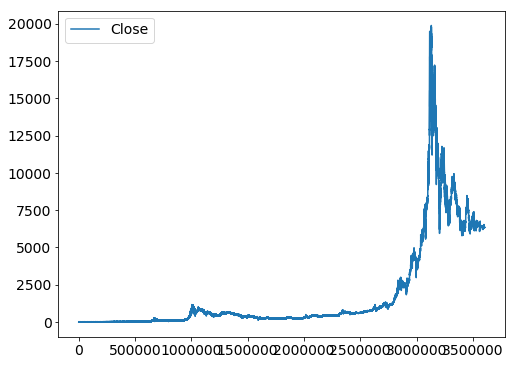

In [87]:
BTC_time_close_df.plot()

plt.show()

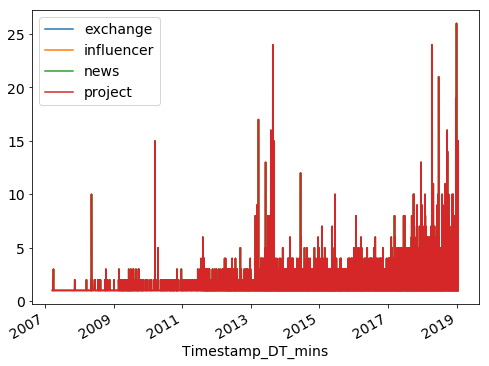

In [88]:
tweets_by_minute.plot()

plt.show()

In [89]:
tweets_master.head()

,date,exchange,influencer,news,project,retweets,tweet_text,user,Timestamp_DT,Timestamp_DT_mins
0,2019-01-15 05:54:12,0,1,0,0,0,https://www.theguardian.com/world/2019/jan/15/...,@mikojava,2019-01-15 05:54:12,2019-01-15 05:54:00
1,2019-01-11 22:27:50,0,1,0,0,0,https://www.facebook.com/mikos/posts/101580781...,@mikojava,2019-01-11 22:27:50,2019-01-11 22:27:00
2,2019-01-11 14:22:52,0,1,0,0,0,Stripe is not 7 lines of code,@mikojava,2019-01-11 14:22:52,2019-01-11 14:22:00
3,2019-01-05 07:18:46,0,1,0,0,1,https://www.netflix.com/watch/80209469?trackId...,@mikojava,2019-01-05 07:18:46,2019-01-05 07:18:00
4,2019-01-03 19:41:30,0,1,0,0,0,Happy 10th birthday to the Bitcoin Genesis blo...,@mikojava,2019-01-03 19:41:30,2019-01-03 19:41:00


In [90]:
tweets_master.to_csv('2.Processed_data/Tweets_master_20180211.csv')

In [91]:
bitcoin_master_v2.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price,Timestamp_DT
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39,2011-12-31 07:52:00
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:53:00
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:54:00
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:55:00
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2011-12-31 07:56:00


In [92]:
bitcoin_master_v2.to_csv('2.Processed_data/master_bitcoin_data_20180211.csv')